# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 600


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [17]:
# Set the API base URL
url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = url + f"&q={city}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url).json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = city_weather['dt']
        

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | muncie
Processing Record 2 of Set 1 | bethel
Processing Record 3 of Set 1 | saint albans
Processing Record 4 of Set 1 | katsuren-haebaru
Processing Record 5 of Set 1 | nacala
Processing Record 6 of Set 1 | saipan
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | antu
Processing Record 9 of Set 1 | el burgo de osma
Processing Record 10 of Set 1 | poronaysk
Processing Record 11 of Set 1 | cargados carajos
City not found. Skipping...
Processing Record 12 of Set 1 | badger
Processing Record 13 of Set 1 | adamstown
Processing Record 14 of Set 1 | kongolo
Processing Record 15 of Set 1 | arraial do cabo
Processing Record 16 of Set 1 | ruovesi
Processing Record 17 of Set 1 | bredasdorp
Processing Record 18 of Set 1 | port-aux-francais
Processing Record 19 of Set 1 | hithadhoo
Processing Record 20 of Set 1 | malango
Processing Record 21 of Set 1 | guerrero negro
Processing Record 22 

City not found. Skipping...
Processing Record 37 of Set 4 | kabalo
Processing Record 38 of Set 4 | afaahiti
Processing Record 39 of Set 4 | wailua homesteads
Processing Record 40 of Set 4 | kharkhorin
Processing Record 41 of Set 4 | hailar
Processing Record 42 of Set 4 | mahibadhoo
Processing Record 43 of Set 4 | gizo
Processing Record 44 of Set 4 | hirara
Processing Record 45 of Set 4 | ketchikan
Processing Record 46 of Set 4 | chu
Processing Record 47 of Set 4 | mukalla
Processing Record 48 of Set 4 | dalandzadgad
Processing Record 49 of Set 4 | nemuro
Processing Record 0 of Set 5 | hermanus
Processing Record 1 of Set 5 | chinde
Processing Record 2 of Set 5 | aginskoye
Processing Record 3 of Set 5 | copiapo
Processing Record 4 of Set 5 | kletnya
Processing Record 5 of Set 5 | chegdomyn
Processing Record 6 of Set 5 | nagqu
Processing Record 7 of Set 5 | antsiranana
Processing Record 8 of Set 5 | kharp
Processing Record 9 of Set 5 | lobez
Processing Record 10 of Set 5 | puerto san carl

Processing Record 29 of Set 8 | ha'il
Processing Record 30 of Set 8 | puerto carreno
Processing Record 31 of Set 8 | bengkulu
Processing Record 32 of Set 8 | gargalianoi
Processing Record 33 of Set 8 | khorixas
Processing Record 34 of Set 8 | lokbatan
Processing Record 35 of Set 8 | cooma
Processing Record 36 of Set 8 | turpan
Processing Record 37 of Set 8 | kapa'a
Processing Record 38 of Set 8 | fatezh
Processing Record 39 of Set 8 | cold lake
Processing Record 40 of Set 8 | yatou
Processing Record 41 of Set 8 | hasaki
Processing Record 42 of Set 8 | modimolle
Processing Record 43 of Set 8 | remire-montjoly
Processing Record 44 of Set 8 | poretskoye
Processing Record 45 of Set 8 | benjamin constant
Processing Record 46 of Set 8 | dudinka
Processing Record 47 of Set 8 | fortaleza
Processing Record 48 of Set 8 | dunedin
Processing Record 49 of Set 8 | gannan
Processing Record 0 of Set 9 | nova vicosa
Processing Record 1 of Set 9 | portland
Processing Record 2 of Set 9 | kenora
Processin

Processing Record 19 of Set 12 | nguigmi
Processing Record 20 of Set 12 | ciudad lazaro cardenas
Processing Record 21 of Set 12 | canico
Processing Record 22 of Set 12 | rio gallegos
Processing Record 23 of Set 12 | arys
Processing Record 24 of Set 12 | oltinko'l
Processing Record 25 of Set 12 | arkhipo-osipovka
Processing Record 26 of Set 12 | suva
Processing Record 27 of Set 12 | banda aceh
Processing Record 28 of Set 12 | zhumadian
Processing Record 29 of Set 12 | sinabang
Processing Record 30 of Set 12 | cangucu
Processing Record 31 of Set 12 | divichibazar
City not found. Skipping...
Processing Record 32 of Set 12 | savanna-la-mar
Processing Record 33 of Set 12 | moog
Processing Record 34 of Set 12 | gaalkacyo
Processing Record 35 of Set 12 | timaru
Processing Record 36 of Set 12 | shiraoi
Processing Record 37 of Set 12 | nikolayevsk-on-amure
Processing Record 38 of Set 12 | mukah
City not found. Skipping...
Processing Record 39 of Set 12 | santa rosalia
Processing Record 40 of Se

In [20]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          574
Lat           574
Lng           574
Max Temp      574
Humidity      574
Cloudiness    574
Wind Speed    574
Country       574
Date          574
dtype: int64

In [21]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,muncie,40.1934,-85.3864,27.15,66,40,3.60,US,1683921006
1,bethel,41.3712,-73.4140,30.02,24,0,4.63,US,1683921411
2,saint albans,51.7500,-0.3333,11.14,94,100,9.26,GB,1683921411
3,katsuren-haebaru,26.3369,127.8719,22.01,68,20,0.00,JP,1683921412
4,nacala,-14.5428,40.6728,24.75,83,77,1.64,MZ,1683921412


In [25]:
# Export the City_Data into a csv
city_data_df.to_csv("cities_weather.csv", index_label="City_ID")

In [26]:
# Read saved data
city_data_df = pd.read_csv("/Users/nguyengiang/Downloads/Starter_Code-7/starter_code/cities_weather.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muncie,40.1934,-85.3864,27.15,66,40,3.60,US,1683921006
1,bethel,41.3712,-73.4140,30.02,24,0,4.63,US,1683921411
2,saint albans,51.7500,-0.3333,11.14,94,100,9.26,GB,1683921411
3,katsuren-haebaru,26.3369,127.8719,22.01,68,20,0.00,JP,1683921412
4,nacala,-14.5428,40.6728,24.75,83,77,1.64,MZ,1683921412


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

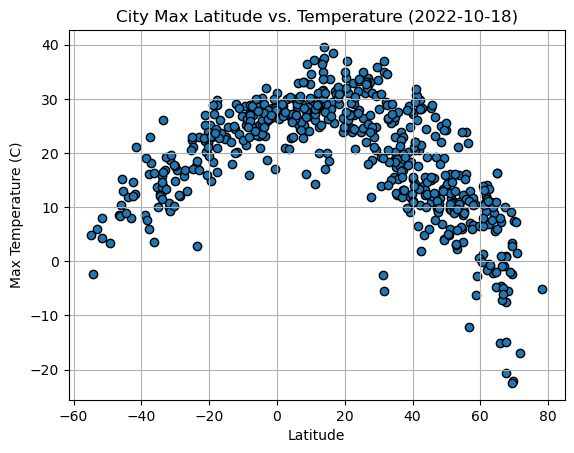

In [37]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'],edgecolors='black', linewidths=1)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Temperature (2022-10-18)')
plt.ylabel('Max Temperature (C)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("Fig1_weather.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

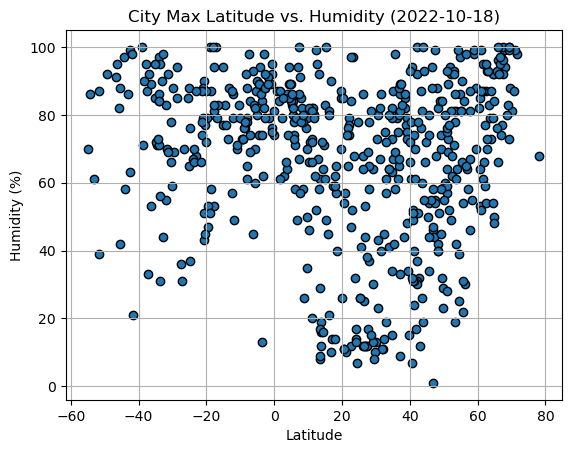

In [39]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'],edgecolors='black', linewidths=1)

# Incorporate the other graph properties
plt.title('City Max Latitude vs. Humidity (2022-10-18)')
plt.ylabel('Humidity (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("Fig2_weather.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

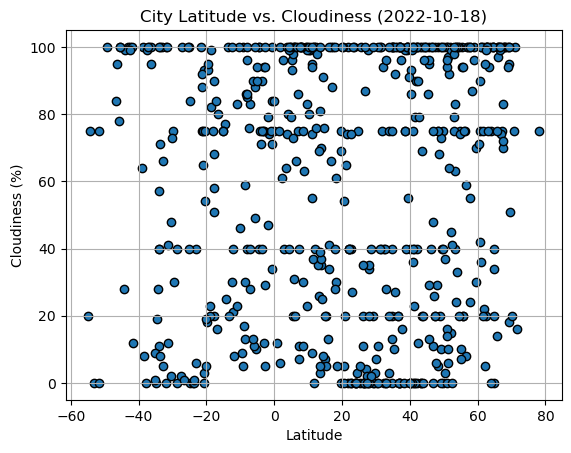

In [41]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'],edgecolors='black', linewidths=1)

# Incorporate the other graph properties
plt.title('City Latitude vs. Cloudiness (2022-10-18)')
plt.ylabel('Cloudiness (%)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("Fig3_weather.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

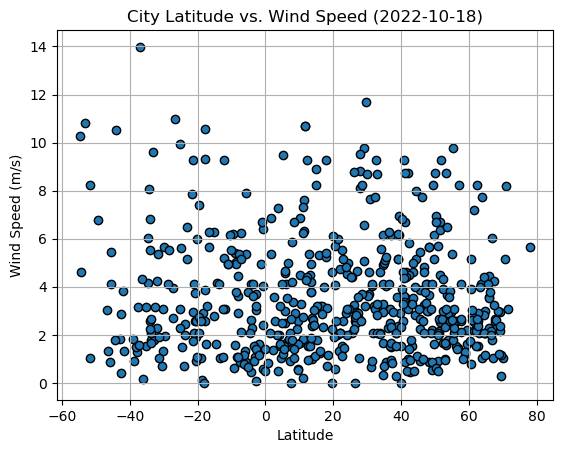

In [43]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'],edgecolors='black', linewidths=1)

# Incorporate the other graph properties
plt.title('City Latitude vs. Wind Speed (2022-10-18)')
plt.ylabel('Wind Speed (m/s)')
plt.xlabel('Latitude')
plt.grid()

# Save the figure
plt.savefig("Fig4_weather.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [49]:
# Define a function to create Linear Regression plots
def linear_regression_plot(x, y, x_label='', y_label='', title=''):
    slope, intercept, r_value, p_value, std_err = linregress(x, y)
    line = slope * x + intercept

In [47]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,muncie,40.1934,-85.3864,27.15,66,40,3.60,US,1683921006
1,bethel,41.3712,-73.4140,30.02,24,0,4.63,US,1683921411
2,saint albans,51.7500,-0.3333,11.14,94,100,9.26,GB,1683921411
3,katsuren-haebaru,26.3369,127.8719,22.01,68,20,0.00,JP,1683921412
5,saipan,15.1355,145.7010,27.39,100,20,1.79,MP,1683921413


In [48]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] <0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,nacala,-14.5428,40.6728,24.75,83,77,1.64,MZ,1683921412
6,grytviken,-54.2811,-36.5092,-2.28,86,75,4.63,GS,1683921413
11,adamstown,-25.0660,-130.1015,22.42,65,100,9.93,PN,1683921416
12,kongolo,-5.3833,27.0000,23.17,87,10,0.69,CD,1683921416
13,arraial do cabo,-22.9661,-42.0278,22.98,68,40,5.14,BR,1683921417


###  Temperature vs. Latitude Linear Regression Plot

The r-value is: -0.777672630162631


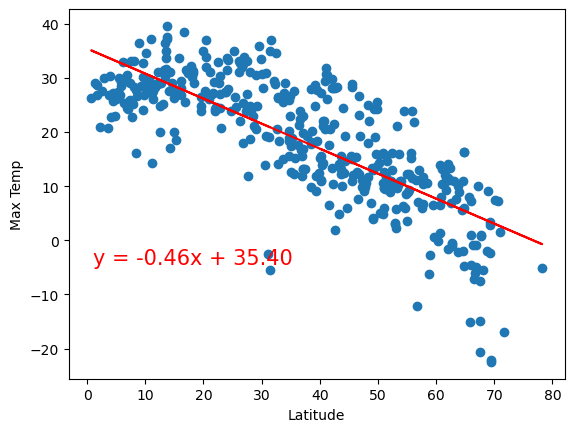

In [71]:
# Linear regression on Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Max Temp']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
print(f'The r-value is: {r_value}')

plt.plot(x, y, 'o')
plt.plot(x, line, color='red')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, xy=(0.05, 0.3), xycoords='axes fraction', fontsize=15, color= 'red', ha='left', va='bottom')
    
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

The r-value is: 0.8321341504647478


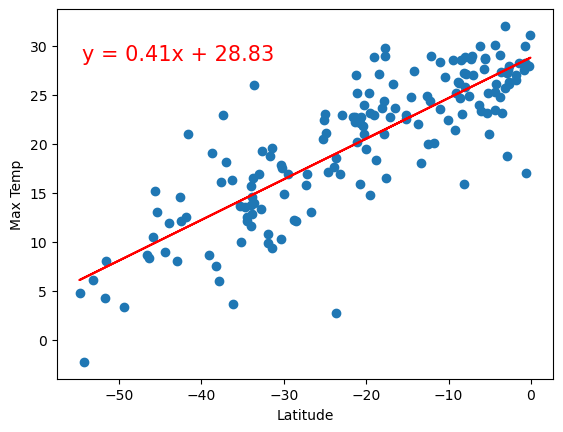

In [74]:
# Linear regression on Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Max Temp']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
print(f'The r-value is: {r_value}')

plt.plot(x, y, 'o')
plt.plot(x, line, color='red')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, xy=(0.05, 0.85), xycoords='axes fraction', fontsize=15, color= 'red', ha='left', va='bottom')
    
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

**Discussion about the linear relationship:** 
- Both plots from Nothern and Southern Hemisphere show a negative relationship between latitude and maximum temperature. As the latitude from two plots increases and moves towards the Poles, the maximum temperature tends to decrease. 
- The relationship appears to be stronger in the Southern Hemisphere plot then Northern Hemisphere, as indicated by the higher absolute value of the r-value (0.83) compared to (=0.78).
- There are some outliers in both plots.

### Humidity vs. Latitude Linear Regression Plot

The r-value is: 0.17699485278624


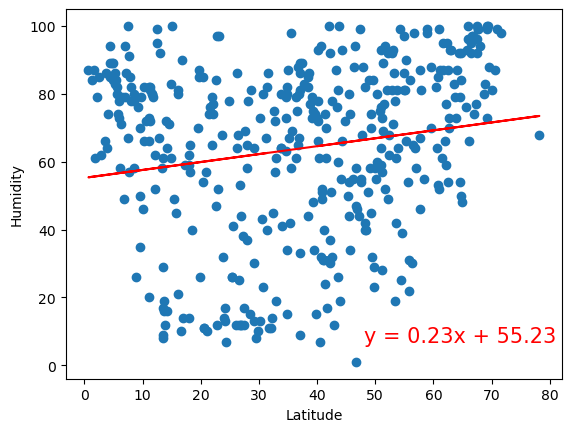

In [80]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Humidity']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
print(f'The r-value is: {r_value}')

plt.plot(x, y, 'o')
plt.plot(x, line, color='red')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, xy=(0.6, 0.1), xycoords='axes fraction', fontsize=15, color= 'red')
    
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

The r-value is: 0.09406704802059436


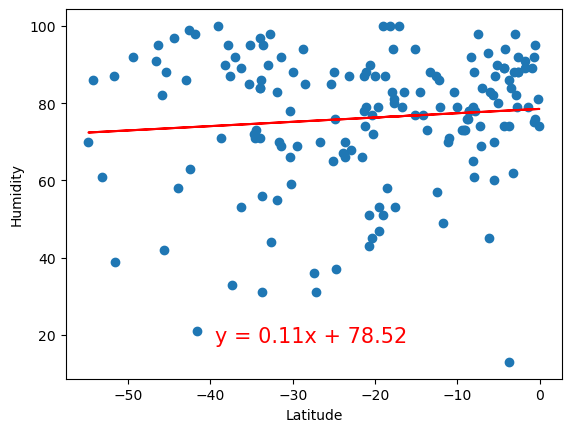

In [83]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Humidity']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
print(f'The r-value is: {r_value}')

plt.plot(x, y, 'o')
plt.plot(x, line, color='red')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, xy=(0.3, 0.1), xycoords='axes fraction', fontsize=15, color= 'red')
    
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

**Discussion about the linear relationship:** 
- Northern Hemispere plot tends to show a slightly positive linear relationship between latitude and humidity as the latitde increases and moves towards north, the humidity increases as well. 
- On the other hand, Southern Hemisphere plot shows a slightly negative linear relationship.
- The relationship between latitude and humidity is not strong in both plots, as indicated by the relatively low absolute value of the r-values. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-value is: 0.08846982337474067


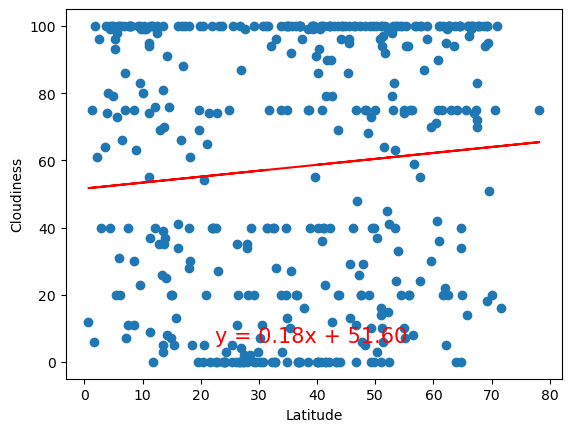

In [85]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Cloudiness']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
print(f'The r-value is: {r_value}')

plt.plot(x, y, 'o')
plt.plot(x, line, color='red')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, xy=(0.3, 0.1), xycoords='axes fraction', fontsize=15, color= 'red')
    
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

The r-value is: 0.052691182982807144


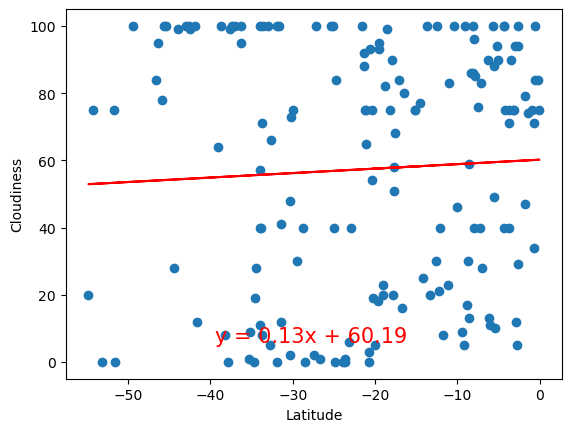

In [87]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Cloudiness']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
print(f'The r-value is: {r_value}')

plt.plot(x, y, 'o')
plt.plot(x, line, color='red')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, xy=(0.3, 0.1), xycoords='axes fraction', fontsize=15, color= 'red')
    
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

**Discussion about the linear relationship:**
- Both Northern and Southern Hemisphere plots show a weak linear relationship between latitude and cloudiness. In Northern Hemisphere, as the latitude increases and moves towards the North Pole, the cloudiness tends to increase slightly. On the other hand, Southern Hemisphere plot appears to be a negative relationship as the latitude moves towards South Pole, the cloudiness tends to decrease.
- Additionally, the r-values of these plots are relatively low in the absolute value which confirm the relationship of the two variables is not strong.


### Wind Speed vs. Latitude Linear Regression Plot

The r-value is: -0.04787380688942356


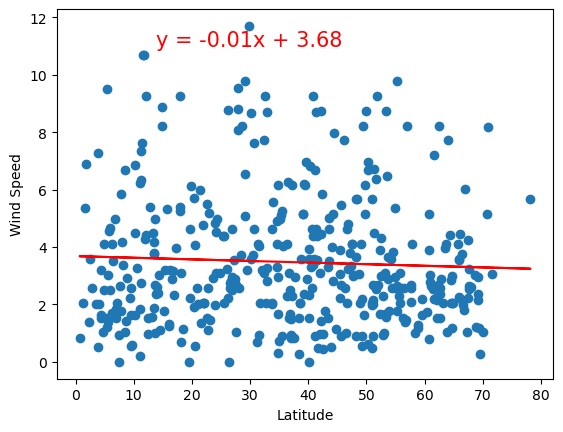

In [97]:
# Northern Hemisphere
x = northern_hemi_df['Lat']
y = northern_hemi_df['Wind Speed']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
print(f'The r-value is: {r_value}')

plt.plot(x, y, 'o')
plt.plot(x, line, color='red')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, xy=(0.2, 0.9), xycoords='axes fraction', fontsize=15, color= 'red')
    
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()

The r-value is: -0.16650300888267477


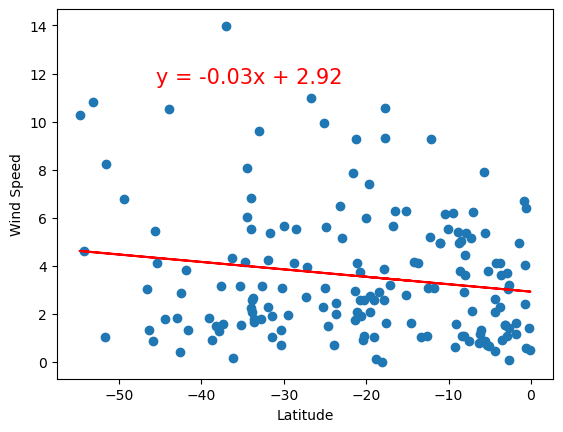

-0.030921583685080994


In [98]:
# Southern Hemisphere
x = southern_hemi_df['Lat']
y = southern_hemi_df['Wind Speed']
slope, intercept, r_value, p_value, std_err = linregress(x, y)
line = slope * x + intercept
print(f'The r-value is: {r_value}')

plt.plot(x, y, 'o')
plt.plot(x, line, color='red')
equation = f'y = {slope:.2f}x + {intercept:.2f}'
plt.annotate(equation, xy=(0.2, 0.8), xycoords='axes fraction', fontsize=15, color= 'red')
    
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
plt.show()


**Discussion about the linear relationship:** 
- Both plots show a weak linear relationship between latitude and wind speed but the direction of the relationship is different. While wind speed tends to decrease slightly as the latitude increases in Northern Hemisphere, it is opposite in Southern Hamisphere when wind speeds increases as the latitude moves towards South Pole. 
- The r-values in both Northern and Southern Hemisphere are relatively low in absolute value, which confirm that the linear relationship between latitude and wind speed is not very strong.
- Although there are noticeable amount of scatter in the data points in both plots, Northern Hemisphere appears to have more outliers (latitude 10 and 30 degrees) than Southern Hemisphere, which could potentially influence the relationship between 2 variables.